## Identifying Duplicate Questions

Over 100 million people visit Quora every month, so it's no surprise that many people ask similar (or the same) questions. Various questions with the same intent can cause people to spend extra time searching for the best answer to their question, and results in members answering multiple versions of the same question. Quora uses random forest to identify duplicated questions to provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
Follow the steps outlined below to build the appropriate classifier model. 


Steps:
- Download data
- Exploration
- Cleaning
- Feature Engineering
- Modeling

By the end of this project you should have **a presentation that describes the model you built** and its **performance**. 


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/train.csv", index_col=0)

In [3]:
df.head()

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.shape

(404290, 5)

In [5]:
# check balance of data
df['is_duplicate'].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [7]:
df.isna().sum()

qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
df.dropna(inplace=True)

#### Note
There is no designated test.csv file. The train.csv file is the entire dataset. Part of the data in the train.csv file should be set aside to act as the final testing data.

In [25]:
test_df = df.sample(frac=.25)
train_df = df.drop(test_df.index)
print(train_df.shape, test_df.shape)

(303215, 5) (101072, 5)


In [29]:
test_df['is_duplicate'].value_counts()

0    63712
1    37360
Name: is_duplicate, dtype: int64

In [30]:
train_df['is_duplicate'].value_counts()

0    191312
1    111903
Name: is_duplicate, dtype: int64

### Exploration

In [26]:
train_df.dtypes

qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object

In [28]:
train_df.describe()

,qid1,qid2,is_duplicate
count,303215.000000,303215.000000,303215.000000
mean,217150.067239,221068.452085,0.369055
std,157749.879337,159945.089304,0.482550
min,1.000000,2.000000,0.000000
25%,74333.000000,74773.000000,0.000000
50%,192051.000000,197233.000000,0.000000
75%,346240.500000,354786.000000,1.000000
max,537932.000000,537933.000000,1.000000


qid1 and qid2 columns can be dropped as they don't bring any new info to analysis

In [31]:
train_df['is_duplicate'].value_counts()

0    191312
1    111903
Name: is_duplicate, dtype: int64

Data contains a slight imbalance. Will check if oversampling improves model performance.

In [32]:
# explore sample of texts
print(train_df['question1'].values[:15])
print(train_df['question2'].values[:15])

['What is the step by step guide to invest in share market in india?'
 'What is the story of Kohinoor (Koh-i-Noor) Diamond?'
 'How can I increase the speed of my internet connection while using a VPN?'
 'Why am I mentally very lonely? How can I solve it?'
 'Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?'
 'Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?'
 'Should I buy tiago?' 'How can I be a good geologist?'
 'Motorola (company): Can I hack my Charter Motorolla DCX3400?'
 'How do I read and find my YouTube comments?'
 'What can make Physics easy to learn?'
 'What was your first sexual experience like?'
 'What are the laws to change your status from a student visa to a green card in the US, how do they compare to the immigration laws in Canada?'
 'What would a Trump presidency mean for current international master’s students on an F1 visa?'
 'What does manipulation mean?']
['What is the step by step guide to invest in

In [33]:
print(train_df['question1'].values[2135:2145])
print(train_df['question2'].values[2135:2145])

['Why do people believe in God?' 'What is a quantum watch?'
 'What are some cultural faux pas in space?'
 'How does the finance credit score work?'
 'Which is correct - "Looking forward to work with","Looking forward to working with" or "Look forward to working with"?'
 'What should be the first question to ask on Quora?'
 'What are wart bandaids and how do they work?'
 'Are horoscopes legitimate? Do they ever come true?'
 'Why does Quora succeed in spite of having some other Q and A websites like Yahoo Answers and Wiki Answers?'
 'What are some substitutes for butter?']
['Why do people believe in god when the level of proof is so low?'
 'What is a Quantum?' 'What are some cultural faux pas in China?'
 'How does the credit score range work?'
 'Is the correct grammar "I look forward to meet you" or "I look forward to meeting you"?'
 'What can be my first question for Quora?' 'How do warts/hpv work?'
 'Do horoscope predictions and palm reading come out to be true?'
 'How has Quora succee

In [35]:
train_df[train_df['question1'].str.len() < 10]

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
3306,6553,6554,.,Why is Cornell's endowment the lowest in the I...,0
13016,25026,25027,?,Why should one not work at Google?,0
17682,33561,33562,deleted,Which website will be suitable for downloading...,0
20794,39204,39205,?,What is the Gmail tech support help phone number?,0
23305,33561,43661,deleted,Which are some best websites for downloading n...,0
23884,44699,44700,HH,What is hh?,0
25228,47035,47036,What?,What should Indians do if Donald Trump becomes...,0
25315,47198,29712,deleted,What kind of questions on Quora aren't OK? Wha...,0
39769,33561,72063,deleted,What is a website where I can download eBooks ...,0


Pretty normal looking writing for the most part. Handful of non-sense entries that will be dropped.

### Cleaning

- Tokenization
- Stopwords cleaning
- Removing punctuation
- Normalizing
- Stemming

In [38]:
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
import re

In [39]:
def filter_punctuation(text):
    clean_text = [word for word in text if word not in string.punctuation]
    return clean_text
        

In [66]:
def one_word_filter(text):
    '''
    Removes any rows with only one word questions.
    '''
    if len(text) < 2:
        return []
    else:
        return text

In [67]:
stop_words = stopwords.words('english')

def filter_stop_words(text):
    filtered_text = [word.lower() for word in text if word not in stop_words]
    return filtered_text

In [68]:
porter = PorterStemmer()
def stemmer(text):
    stemmed_text = [porter.stem(word) for word in text]
    return stemmed_text

In [69]:
def preprocess_text(text):
    text_clean = wordpunct_tokenize(text)
    text_clean = filter_punctuation(text_clean)
    text_clean = one_word_filter(text_clean)
    text_clean = filter_stop_words(text_clean)

    return text_clean

In [70]:
train_df['q1_clean'] = train_df['question1'].apply(lambda x: preprocess_text(x))
train_df['q2_clean'] = train_df['question2'].apply(lambda x: preprocess_text(x))

#### Drop rows with one word questions

In [96]:
train_df[train_df['q1_clean'].apply(lambda x: len(x) == 0)]

,qid1,qid2,question1,question2,is_duplicate,q1_clean,q2_clean
id,,,,,,,
3306,6553,6554,.,Why is Cornell's endowment the lowest in the I...,0,[],"[why, cornell, endowment, lowest, ivy, league]"
13016,25026,25027,?,Why should one not work at Google?,0,[],"[why, one, work, google]"
17682,33561,33562,deleted,Which website will be suitable for downloading...,0,[],"[which, website, suitable, downloading, ebooks..."
20794,39204,39205,?,What is the Gmail tech support help phone number?,0,[],"[what, gmail, tech, support, help, phone, number]"
23305,33561,43661,deleted,Which are some best websites for downloading n...,0,[],"[which, best, websites, downloading, newly, pu..."
23884,44699,44700,HH,What is hh?,0,[],"[what, hh]"
25228,47035,47036,What?,What should Indians do if Donald Trump becomes...,0,[],"[what, indians, donald, trump, becomes, presid..."
25315,47198,29712,deleted,What kind of questions on Quora aren't OK? Wha...,0,[],"[what, kind, questions, quora, ok, what, quora..."
39769,33561,72063,deleted,What is a website where I can download eBooks ...,0,[],"[what, website, i, download, ebooks, legally]"


In [100]:
drop_list = train_df[(train_df['q1_clean'].apply(lambda x: len(x) == 0)) | (train_df['q2_clean'].apply(lambda x: len(x) == 0))]

In [101]:
len(drop_list.index)

73

In [102]:
clean_df = train_df.drop(drop_list.index)

In [104]:
clean_df.drop(columns=['qid1', 'qid2', 'question1', 'question2'], inplace=True)

In [107]:
clean_df['q1_stemmed'] = clean_df['q1_clean'].apply(lambda x: stemmer(x))
clean_df['q2_stemmed'] = clean_df['q2_clean'].apply(lambda x: stemmer(x))
clean_df.head()

,is_duplicate,q1_clean,q2_clean,q1_stemmed,q2_stemmed
id,,,,,
0,0,"[what, step, step, guide, invest, share, marke...","[what, step, step, guide, invest, share, market]","[what, step, step, guid, invest, share, market...","[what, step, step, guid, invest, share, market]"
1,0,"[what, story, kohinoor, koh, noor, diamond]","[what, would, happen, indian, government, stol...","[what, stori, kohinoor, koh, noor, diamond]","[what, would, happen, indian, govern, stole, k..."
2,0,"[how, i, increase, speed, internet, connection...","[how, internet, speed, increased, hacking, dns]","[how, i, increas, speed, internet, connect, us...","[how, internet, speed, increas, hack, dn]"
3,0,"[why, i, mentally, lonely, how, i, solve]","[find, remainder, math, 23, ^{, 24, }[/, math,...","[whi, i, mental, lone, how, i, solv]","[find, remaind, math, 23, ^{, 24, }[/, math, d..."
4,0,"[which, one, dissolve, water, quikly, sugar, s...","[which, fish, would, survive, salt, water]","[which, one, dissolv, water, quikli, sugar, sa...","[which, fish, would, surviv, salt, water]"


In [108]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(clean_df.drop(columns='is_duplicate'), clean_df['is_duplicate'], test_size=.2, random_state=58)

### More Exploration of Clean Data

In [23]:
X_clean['q1_length'] = X_clean['q1_clean'].apply(lambda x: len(x))
X_clean['q2_length'] = X_clean['q2_clean'].apply(lambda x: len(x))
X_clean['q1_unique_words'] = X_clean['q1_clean'].apply(lambda x: len(set(x)))
X_clean['q2_unique_words'] = X_clean['q2_clean'].apply(lambda x: len(set(x)))
X_clean.head()

,q1_clean,q2_clean,q1_length,q2_length,q1_unique_words,q2_unique_words
id,,,,,,
190962,"[i, look, websit, promot, how, i, find, best, ...","[which, best, seo, compani, delhi, ncr, optim,...",14,10,11,10
89771,"[what, way, reduc, fat, belli, ]","[how, i, reduc, belli, fat, overal, weight, ]",6,8,6,8
134325,"[where, industri, autom, ]","[do, human, realli, exist, live, spiritu, virt...",4,9,4,9
259425,"[how, i, delet, photo, iphon, keep, icloud, ]","[if, i, icloud, i, delet, photo, phone, ]",8,8,8,7
299907,"[what, best, branch, postgradu, studi, dentist...","[what, best, branch, postgradu, dentistri, ]",7,6,7,6


In [24]:
X_clean.describe()

,q1_length,q2_length,q1_unique_words,q2_unique_words
count,303215.000000,303215.000000,303215.000000,303215.000000
mean,7.859097,7.975186,7.617535,7.693346
std,3.263117,3.688520,2.879982,3.150962
min,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6.000000,6.000000,6.000000
50%,7.000000,7.000000,7.000000,7.000000
75%,9.000000,9.000000,9.000000,9.000000
max,65.000000,131.000000,58.000000,94.000000


(array([1.06000e+02, 6.35700e+04, 1.10851e+05, 8.01530e+04, 2.28340e+04,
        1.52250e+04, 6.71100e+03, 1.81900e+03, 1.10700e+03, 3.26000e+02,
        2.58000e+02, 1.28000e+02, 4.40000e+01, 4.50000e+01, 1.60000e+01,
        1.40000e+01, 1.00000e+00, 2.00000e+00, 2.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. , 15.6, 18.2, 20.8, 23.4, 26. ,
        28.6, 31.2, 33.8, 36.4, 39. , 41.6, 44.2, 46.8, 49.4, 52. , 54.6,
        57.2, 59.8, 62.4, 65. ]),
 <BarContainer object of 25 artists>)

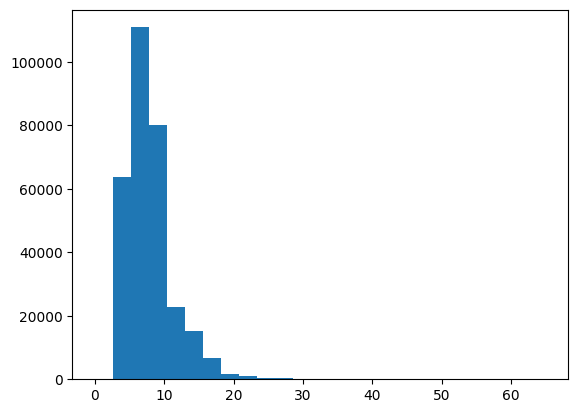

In [34]:
import matplotlib.pyplot as plt
plt.hist(X_clean['q1_length'], bins=25)

(array([6.45830e+04, 1.87797e+05, 3.70030e+04, 1.05850e+04, 2.31200e+03,
        5.53000e+02, 2.68000e+02, 6.40000e+01, 1.70000e+01, 3.00000e+00,
        5.00000e+00, 2.00000e+00, 3.00000e+00, 4.00000e+00, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+01, 0.00000e+00, 3.00000e+00]),
 array([  0.  ,   5.24,  10.48,  15.72,  20.96,  26.2 ,  31.44,  36.68,
         41.92,  47.16,  52.4 ,  57.64,  62.88,  68.12,  73.36,  78.6 ,
         83.84,  89.08,  94.32,  99.56, 104.8 , 110.04, 115.28, 120.52,
        125.76, 131.  ]),
 <BarContainer object of 25 artists>)

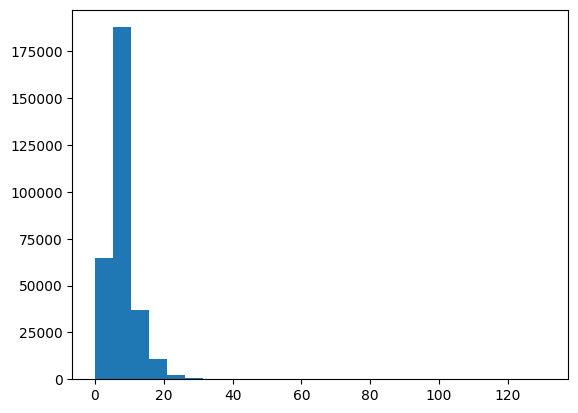

In [35]:
plt.hist(X_clean['q2_length'], bins=25)


### Feature Engineering

- tf-idf
- word2vec
- word count
- number of the same words in both questions
- ....

#### TF-IDF

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [116]:
vectorizer = TfidfVectorizer(min_df=2, use_idf=True, max_df=.85, max_features=1000)
corpus = [' '.join(words) for words in X_train['q1_stemmed'].values.tolist()] + [' '.join(words) for words in X_train['q2_stemmed'].values.tolist()]

In [118]:
vectorizer.fit(corpus)

TfidfVectorizer(max_df=0.85, max_features=1000, min_df=2)

In [135]:
q1_stemmed_joined = [' '.join(words) for words in X_train['q1_stemmed'].values.tolist()]
q2_stemmed_joined = [' '.join(words) for words in X_train['q2_stemmed'].values.tolist()]
vectorizer.fit(q1_stemmed_joined + q2_stemmed_joined)
q1_vect = vectorizer.transform(q1_stemmed_joined)
q2_vect = vectorizer.transform(q2_stemmed_joined)

In [137]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = [cosine_similarity(q1_vect[i],q2_vect[i]) for i in range(q1_vect.shape[0])]
cosine_sim = [cos_sim[i][0][0] for i in range(len(cos_sim))]
X_train['cosine_similarity'] = cosine_sim

In [138]:
X_train.head()

,q1_clean,q2_clean,q1_stemmed,q2_stemmed,cosine_similarity
id,,,,,
163578,"[did, opinion, john, green, change, found, use...","[i, found, nearly, 18, year, old, brother, sis...","[did, opinion, john, green, chang, found, use,...","[i, found, nearli, 18, year, old, brother, sis...",0.295574
256543,"[emoticons, how, one, create, implement, custo...","[emoticons, how, one, create, implement, custo...","[emoticon, how, one, creat, implement, custom,...","[emoticon, how, one, creat, implement, custom,...",0.750865
323497,"[when, india, going, cross, 20000, usd, gdp, p...","[how, soon, would, india, gdp, cross, 10, tril...","[when, india, go, cross, 20000, usd, gdp, per,...","[how, soon, would, india, gdp, cross, 10, tril...",0.324004
139361,"[why, sometimes, i, decide, let, life, go, i, ...","[why, i, sometimes, struggle, swallow, i, forc...","[whi, sometim, i, decid, let, life, go, i, tri...","[whi, i, sometim, struggl, swallow, i, forc, h...",0.070691
196050,"[how, i, gain, self, discipline]","[how, i, gain, self, discipline]","[how, i, gain, self, disciplin]","[how, i, gain, self, disciplin]",1.000000


In [149]:
def words_in_common(text1, text2):
    common_words = set(text1).intersection(set(text2))
    total_words = set(text1).union(set(text2))
    ratio = len(common_words) / len(total_words)
    return ratio

In [151]:
common_words = [words_in_common(X_train.iloc[i]['q1_stemmed'], X_train.iloc[i]['q2_stemmed']) for i in range(X_train.shape[0])]
X_train['num_common_words'] = common_words

In [152]:
X_train.head()

,q1_clean,q2_clean,q1_stemmed,q2_stemmed,cosine_similarity,num_common_words
id,,,,,,
163578,"[did, opinion, john, green, change, found, use...","[i, found, nearly, 18, year, old, brother, sis...","[did, opinion, john, green, chang, found, use,...","[i, found, nearli, 18, year, old, brother, sis...",0.295574,0.086957
256543,"[emoticons, how, one, create, implement, custo...","[emoticons, how, one, create, implement, custo...","[emoticon, how, one, creat, implement, custom,...","[emoticon, how, one, creat, implement, custom,...",0.750865,0.777778
323497,"[when, india, going, cross, 20000, usd, gdp, p...","[how, soon, would, india, gdp, cross, 10, tril...","[when, india, go, cross, 20000, usd, gdp, per,...","[how, soon, would, india, gdp, cross, 10, tril...",0.324004,0.300000
139361,"[why, sometimes, i, decide, let, life, go, i, ...","[why, i, sometimes, struggle, swallow, i, forc...","[whi, sometim, i, decid, let, life, go, i, tri...","[whi, i, sometim, struggl, swallow, i, forc, h...",0.070691,0.285714
196050,"[how, i, gain, self, discipline]","[how, i, gain, self, discipline]","[how, i, gain, self, disciplin]","[how, i, gain, self, disciplin]",1.000000,1.000000


#### Word2Vec

In [160]:
embeddings_dict = {}
with open('../../../glove.6B.50d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [164]:
def sentence_embedding(sentence):
    vectors = []
    for word in sentence:
        try:
            vector = embeddings_dict[word]
        except:
            vector = np.zeros(50,)
        vectors.append(vector)
    vectors = np.array(vectors)
    mean_vector = np.mean(vectors, axis=0)

    return mean_vector

In [167]:
sentence_embedding(X_train.loc[0]['q1_clean'])

array([ 0.3525436 , -0.11310638,  0.207085  ,  0.08376749,  0.5305025 ,
       -0.2627275 , -0.295385  , -0.32286564,  0.08120826,  0.3144037 ,
       -0.06440613,  0.22179788, -0.349595  , -0.08865625,  0.20369747,
        0.5561138 ,  0.30829814, -0.0518304 ,  0.11032463, -0.35250574,
        0.69499254,  0.09009797, -0.17055713, -0.04044526,  0.3824728 ,
       -1.4157374 , -0.24046126, -0.33060935,  0.09466875,  0.04182399,
        3.1333375 ,  0.5006488 , -0.23439601,  0.11412874,  0.03437737,
       -0.59875125, -0.39613938,  0.17614138, -0.18062812, -0.34967   ,
       -0.34415373, -0.18238024,  0.22560836,  0.00847887,  0.08407026,
        0.2255038 , -0.06499813,  0.4727825 ,  0.232562  ,  0.10748249],
      dtype=float32)

In [168]:
X_train['q1_embedding'] = X_train['q1_clean'].apply(lambda x: sentence_embedding(x))
X_train['q2_embedding'] = X_train['q2_clean'].apply(lambda x: sentence_embedding(x))

In [170]:
X_train.isna().sum()

q1_clean             0
q2_clean             0
q1_stemmed           0
q2_stemmed           0
cosine_similarity    0
num_common_words     0
q1_embedding         0
q2_embedding         0
dtype: int64

In [171]:
X_train.head()

,q1_clean,q2_clean,q1_stemmed,q2_stemmed,cosine_similarity,num_common_words,q1_embedding,q2_embedding
id,,,,,,,,
163578,"[did, opinion, john, green, change, found, use...","[i, found, nearly, 18, year, old, brother, sis...","[did, opinion, john, green, chang, found, use,...","[i, found, nearli, 18, year, old, brother, sis...",0.295574,0.086957,"[0.06802888, 0.163995, 0.040723626, -0.355245,...","[0.22307427, 0.25132126, 0.0027172086, -0.3773..."
256543,"[emoticons, how, one, create, implement, custo...","[emoticons, how, one, create, implement, custo...","[emoticon, how, one, creat, implement, custom,...","[emoticon, how, one, creat, implement, custom,...",0.750865,0.777778,"[0.3091662470251322, -0.24622212909162045, 0.0...","[0.3551512435078621, -0.11875712592154741, 0.1..."
323497,"[when, india, going, cross, 20000, usd, gdp, p...","[how, soon, would, india, gdp, cross, 10, tril...","[when, india, go, cross, 20000, usd, gdp, per,...","[how, soon, would, india, gdp, cross, 10, tril...",0.324004,0.300000,"[-0.010393252, 0.11362333, 0.4523827, -0.15054...","[-0.006089843, 0.22199723, 0.6835134, -0.10642..."
139361,"[why, sometimes, i, decide, let, life, go, i, ...","[why, i, sometimes, struggle, swallow, i, forc...","[whi, sometim, i, decid, let, life, go, i, tri...","[whi, i, sometim, struggl, swallow, i, forc, h...",0.070691,0.285714,"[0.29436794, 0.019353664, -0.003327012, -0.363...","[0.19290125, -0.24508363, 0.00064862147, -0.57..."
196050,"[how, i, gain, self, discipline]","[how, i, gain, self, discipline]","[how, i, gain, self, disciplin]","[how, i, gain, self, disciplin]",1.000000,1.000000,"[-0.16975199, -0.0499848, -0.10657461, -0.5757...","[-0.16975199, -0.0499848, -0.10657461, -0.5757..."


In [172]:
from scipy.spatial.distance import cosine
cosine_distances = [cosine(X_train['q1_embedding'].values[i], X_train['q2_embedding'].values[i]) for i in range(X_train.shape[0])]
X_train['embedding_cosine_distance'] = cosine_distances
X_train.head()

c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\scipy\spatial\distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


,q1_clean,q2_clean,q1_stemmed,q2_stemmed,cosine_similarity,num_common_words,q1_embedding,q2_embedding,embedding_cosine_distance
id,,,,,,,,,
163578,"[did, opinion, john, green, change, found, use...","[i, found, nearly, 18, year, old, brother, sis...","[did, opinion, john, green, chang, found, use,...","[i, found, nearli, 18, year, old, brother, sis...",0.295574,0.086957,"[0.06802888, 0.163995, 0.040723626, -0.355245,...","[0.22307427, 0.25132126, 0.0027172086, -0.3773...",0.135227
256543,"[emoticons, how, one, create, implement, custo...","[emoticons, how, one, create, implement, custo...","[emoticon, how, one, creat, implement, custom,...","[emoticon, how, one, creat, implement, custom,...",0.750865,0.777778,"[0.3091662470251322, -0.24622212909162045, 0.0...","[0.3551512435078621, -0.11875712592154741, 0.1...",0.022443
323497,"[when, india, going, cross, 20000, usd, gdp, p...","[how, soon, would, india, gdp, cross, 10, tril...","[when, india, go, cross, 20000, usd, gdp, per,...","[how, soon, would, india, gdp, cross, 10, tril...",0.324004,0.300000,"[-0.010393252, 0.11362333, 0.4523827, -0.15054...","[-0.006089843, 0.22199723, 0.6835134, -0.10642...",0.039389
139361,"[why, sometimes, i, decide, let, life, go, i, ...","[why, i, sometimes, struggle, swallow, i, forc...","[whi, sometim, i, decid, let, life, go, i, tri...","[whi, i, sometim, struggl, swallow, i, forc, h...",0.070691,0.285714,"[0.29436794, 0.019353664, -0.003327012, -0.363...","[0.19290125, -0.24508363, 0.00064862147, -0.57...",0.043407
196050,"[how, i, gain, self, discipline]","[how, i, gain, self, discipline]","[how, i, gain, self, disciplin]","[how, i, gain, self, disciplin]",1.000000,1.000000,"[-0.16975199, -0.0499848, -0.10657461, -0.5757...","[-0.16975199, -0.0499848, -0.10657461, -0.5757...",0.000000


### Modeling

Different modeling techniques can be used:

- logistic regression
- XGBoost
- LSTMs
- etc

In [177]:
X_train_final = X_train.drop(columns=['q1_clean', 'q2_clean', 'q1_stemmed', 'q2_stemmed', 'q1_embedding', 'q2_embedding'])
X_train_final.head()

,cosine_similarity,num_common_words,embedding_cosine_distance
id,,,
163578,0.295574,0.086957,0.135227
256543,0.750865,0.777778,0.022443
323497,0.324004,0.300000,0.039389
139361,0.070691,0.285714,0.043407
196050,1.000000,1.000000,0.000000


In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

In [179]:
rfc = RandomForestClassifier()
params = {'n_estimators': [50, 100, 500, 1000], 'max_depth': [None, 4, 6, 8]}
grid = GridSearchCV(estimator=rfc, param_grid=params)
grid.fit(X_train_final, y_train)

c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\ensemble\_forest.py", line 473, in fit
    trees = Parallel(
  File "c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    return super().__call__(

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 4, 6, 8],
                         'n_estimators': [50, 100, 500, 1000]})

### Prep Validation Data

In [194]:
#TF-IDF Vectors
vectorizer = TfidfVectorizer(min_df=2, use_idf=True, max_df=.85, max_features=1000)
val_corpus = [' '.join(words) for words in X_val['q1_stemmed'].values.tolist()] + [' '.join(words) for words in X_val['q2_stemmed'].values.tolist()]
vectorizer.fit(val_corpus)
q1_stemmed_joined = [' '.join(words) for words in X_val['q1_stemmed'].values.tolist()]
q2_stemmed_joined = [' '.join(words) for words in X_val['q2_stemmed'].values.tolist()]
vectorizer.fit(q1_stemmed_joined + q2_stemmed_joined)
q1_vect = vectorizer.transform(q1_stemmed_joined)
q2_vect = vectorizer.transform(q2_stemmed_joined)

# TF-IDF Cosine Similarity
cos_sim = [cosine_similarity(q1_vect[i],q2_vect[i]) for i in range(q1_vect.shape[0])]
cosine_sim = [cos_sim[i][0][0] for i in range(len(cos_sim))]
X_val['cosine_similarity'] = cosine_sim

# Common Words Ratio
common_words = [words_in_common(X_val.iloc[i]['q1_stemmed'], X_val.iloc[i]['q2_stemmed']) for i in range(X_val.shape[0])]
X_val['num_common_words'] = common_words

# Sentence Embeddings
X_val['q1_embedding'] = X_val['q1_clean'].apply(lambda x: sentence_embedding(x))
X_val['q2_embedding'] = X_val['q2_clean'].apply(lambda x: sentence_embedding(x))

# Embedding Cosine Distance


In [195]:
cosine_distances = [cosine(X_val['q1_embedding'].values[i], X_val['q2_embedding'].values[i]) for i in range(X_val.shape[0])]
X_val['embedding_cosine_distance'] = cosine_distances
X_val.head()

c:\Users\HP USER\anaconda3\envs\lhl_data\lib\site-packages\scipy\spatial\distance.py:620: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


,q1_clean,q2_clean,q1_stemmed,q2_stemmed,cosine_similarity,q1_embedding,q2_embedding,embedding_cosine_distance,num_common_words
id,,,,,,,,,
92623,"[what, ultimate, way, serve, humanity]","[what, could, one, serve, humanity]","[what, ultim, way, serv, human]","[what, could, one, serv, human]",0.537219,"[0.244472, 0.2302322, -0.286632, -0.120594, 0....","[0.42357796, 0.0833682, -0.043983996, -0.15204...",0.031561,0.428571
117977,"[what, good, gifts, foreign, visitor, bring, i...","[what, good, gifts, foreign, visitor, bring, i...","[what, good, gift, foreign, visitor, bring, in...","[what, good, gift, foreign, visitor, bring, in...",1.000000,"[0.1983304, 0.5074234, -0.13318858, -0.1563021...","[0.1965204, 0.51229924, -0.15430692, -0.197516...",0.004972,0.846154
13304,"[what, difference, taming, domestication]","[why, domesticate, deer]","[what, differ, tame, domest]","[whi, domest, deer]",0.000000,"[0.23172775, -0.32993227, -0.4672175, -0.40073...","[0.24629728, -0.49875298, -0.20568334, -0.2760...",0.304821,0.166667
347103,"[how, i, get, best, quora]","[how, i, get, quora]","[how, i, get, best, quora]","[how, i, get, quora]",0.887860,"[-0.0086333975, 0.057398, 0.0918428, -0.260415...","[0.21813825, -0.079115, 0.192496, -0.39660248,...",0.018574,0.800000
292232,"[what, verizon, going, yahoo]","[why, verizon, buying, yahoo]","[what, verizon, go, yahoo]","[whi, verizon, buy, yahoo]",0.000000,"[0.68841803, -0.22556224, 0.7137275, 0.685605,...","[0.7500475, -0.36068648, 0.8600675, 0.7680718,...",0.051336,0.333333


In [196]:
X_val_final = X_val.drop(columns=['q1_clean', 'q2_clean', 'q1_stemmed', 'q2_stemmed', 'q1_embedding', 'q2_embedding'])
X_val_final.head()

,cosine_similarity,embedding_cosine_distance,num_common_words
id,,,
92623,0.537219,0.031561,0.428571
117977,1.000000,0.004972,0.846154
13304,0.000000,0.304821,0.166667
347103,0.887860,0.018574,0.800000
292232,0.000000,0.051336,0.333333


In [200]:
cols = X_train_final.columns.tolist()
cols

['cosine_similarity', 'num_common_words', 'embedding_cosine_distance']

In [201]:
X_val_final = X_val_final[cols]
X_val_final.head()

,cosine_similarity,num_common_words,embedding_cosine_distance
id,,,
92623,0.537219,0.428571,0.031561
117977,1.000000,0.846154,0.004972
13304,0.000000,0.166667,0.304821
347103,0.887860,0.800000,0.018574
292232,0.000000,0.333333,0.051336


In [202]:
y_pred = grid.predict(X_val_final)

In [203]:
print(confusion_matrix(y_val, y_pred))
print(accuracy_score(y_val, y_pred))

[[29267  9096]
 [ 8299 13967]]
0.7130910950205347


In [207]:
print(roc_auc_score(y_val, y_pred))

0.6950879003979812


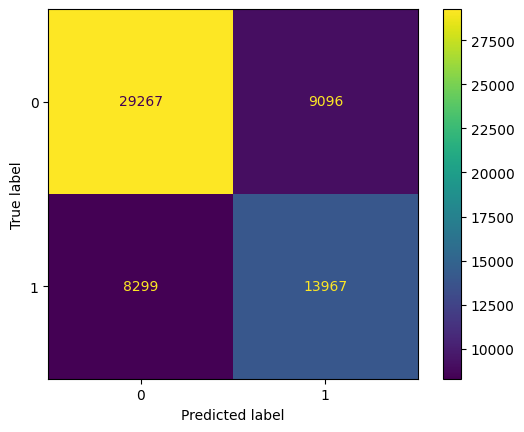

In [206]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred))
disp.plot()

In [209]:
import pickle
filename = 'rfc_model1.sav'
pickle.dump(grid, open(filename, 'wb'))

### Prep Test Data

In [ ]:
# preprocessing
test_df['q1_clean'] = test_df['question1'].apply(lambda x: preprocess_text(x))
test_df['q2_clean'] = test_df['question2'].apply(lambda x: preprocess_text(x))

# dropping single word questions
test_drop_list = test_df[(test_df['q1_clean'].apply(lambda x: len(x) == 0)) | (test_df['q2_clean'].apply(lambda x: len(x) == 0))]
clean_test_df = test_df.drop(test_drop_list.index)

